**Load DataSet**

In [13]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.metrics import accuracy_score, r2_score, f1_score, precision_score, recall_score # model precision
from sklearn.metrics import confusion_matrix # confusion matrix
import seaborn as sns
import itertools

In [16]:
dataset = pd.read_csv("StdCoronaData.csv")
dataset=dataset.drop(['Unnamed: 0'],axis=1)

In [17]:
dataset

,high_risk_exposure_occupation,high_risk_interactions,age,smoker,temperature,cough,fever,sob,diarrhea,fatigue,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,diagnosis
0,1.000000,0.205514,58.0,0.0,36.95,1.0,0.028477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.000000,0.205514,35.0,0.0,36.75,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.073903,0.205514,12.0,0.0,36.95,0.0,0.028477,0.030302,0.020222,0.065147,0.057786,0.007068,0.007206,0.036873,0.036136,0.062977,0
3,1.000000,1.000000,46.0,0.0,36.75,1.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0
4,0.000000,0.205514,-1.0,0.0,36.25,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185359,0.000000,1.000000,23.0,0.0,36.90,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
185360,0.000000,0.000000,12.0,0.0,37.00,0.0,0.028477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
185361,0.000000,1.000000,32.0,0.0,36.95,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
185362,0.000000,1.000000,37.0,0.0,36.70,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1


**Preprocessing**

In [18]:
X= dataset.drop(['diagnosis'],axis=1)
y= dataset['diagnosis']

**Split Train and Test**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [21]:
model_lr = LogisticRegression().fit(X_train, y_train)
probs_lr = model_lr.predict_proba(X_test)[:, 1]
pred_lr = model_lr.predict(X_test)
cm_lr = confusion_matrix(y_test, pred_lr)
print('Accuracy (Logistic Regression) : %.3f ' % accuracy_score(y_test,pred_lr))
print('R2Score (Logistic Regression) : %.3f ' % r2_score(y_test,pred_lr))
print('F1-Score (Logistic Regression) : %.3f ' % f1_score(y_test,pred_lr))
#print('Accuracy (Logistic Regression) : %.3f ' % model_lr.score(X_test, y_test))

model_dt = DecisionTreeClassifier().fit(X_train, y_train)
probs_dt = model_dt.predict_proba(X_test)[:, 1]
pred_dt = model_dt.predict(X_test)
cm_dt = confusion_matrix(y_test, pred_dt)
print('Accuracy (Decision Tree) : %.3f ' % accuracy_score(y_test,pred_dt))
print('R2Score (Decision Tree) : %.3f ' % r2_score(y_test,pred_dt))
print('F1-Score (Decision Tree) : %.3f ' % f1_score(y_test,pred_dt))
#print('Accuracy (Decision Tree) : %.3f ' % model_dt.score(X_test, y_test))


model_rf = RandomForestClassifier().fit(X_train, y_train)
probs_rf = model_rf.predict_proba(X_test)[:, 1]
pred_rf = model_rf.predict(X_test)
cm_rf = confusion_matrix(y_test, pred_rf)
print('Accuracy (Random Forest) : %.3f ' % accuracy_score(y_test,pred_rf))
print('R2Score (Random Forest) : %.3f ' % r2_score(y_test,pred_rf))
print('F1-Score (Random Forest) : %.3f ' % f1_score(y_test,pred_rf))
#print('Accuracy (Random Forest) : %.3f ' % model_rf.score(X_test, y_test))

model_xg = XGBClassifier().fit(X_train, y_train)
probs_xg = model_xg.predict_proba(X_test)[:, 1]
pred_xg = model_xg.predict(X_test)
cm_xg = confusion_matrix(y_test, pred_xg)
print('Accuracy (XGBoost) : %.3f ' % accuracy_score(y_test,pred_xg))
print('R2Score (XGBoost) : %.3f ' % r2_score(y_test,pred_xg))
print('F1-Score (XGBoost) : %.3f ' % f1_score(y_test,pred_xg))
#print('Accuracy (XGBoost) : %.3f ' % model_xg.score(X_test, y_test))

model_knn = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
probs_knn = model_knn.predict_proba(X_test)[:, 1] 
pred_knn = model_knn.predict(X_test)
cm_knn = confusion_matrix(y_test, pred_knn)
print('Accuracy (KNeighbors) : %.3f ' % accuracy_score(y_test,pred_knn))
print('R2Score (KNeighbors) : %.3f ' % r2_score(y_test,pred_knn))
print('F1-Score (KNeighbors) : %.3f ' % f1_score(y_test,pred_knn))
#print('Accuracy (KNeighbors) : %.3f ' % model_knn.score(X_test, y_test))

model_nb = GaussianNB().fit(X_train, y_train)
probs_nb = model_nb.predict_proba(X_test)[:, 1] 
pred_nb = model_nb.predict(X_test)
cm_nb = confusion_matrix(y_test, pred_nb)
print('Accuracy (GaussianNB) : %.3f ' % accuracy_score(y_test,pred_nb))
print('R2Score (GaussianNB) : %.3f ' % r2_score(y_test,pred_nb))
print('F1-Score (GaussianNB) : %.3f ' % f1_score(y_test,pred_nb))
#print('Accuracy (GaussianNB) : %.3f ' % model_nb.score(X_test, y_test))

model_lda = LDA(n_components=1).fit(X_train, y_train)
probs_lda = model_lda.predict_proba(X_test)[:, 1] 
pred_lda = model_lda.predict(X_test)
cm_lda = confusion_matrix(y_test, pred_lda)
print('Accuracy (LinearDiscriminantAnalysis) : %.3f ' % accuracy_score(y_test,pred_lda))
print('R2Score (LinearDiscriminantAnalysis) : %.3f ' % r2_score(y_test,pred_lda))
print('F1-Score (LinearDiscriminantAnalysis) : %.3f ' % f1_score(y_test,pred_lda))
#print('Accuracy (LinearDiscriminantAnalysis) : %.3f ' % model_lda.score(X_test, y_test))


C:\Users\Boulb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (Logistic Regression) : 0.692 
R2Score (Logistic Regression) : -0.232 
F1-Score (Logistic Regression) : 0.618 
Accuracy (Decision Tree) : 0.928 
R2Score (Decision Tree) : 0.713 
F1-Score (Decision Tree) : 0.929 
Accuracy (Random Forest) : 0.932 
R2Score (Random Forest) : 0.730 
F1-Score (Random Forest) : 0.933 


C:\Users\Boulb\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:50:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Boulb\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Accuracy (XGBoost) : 0.849 
R2Score (XGBoost) : 0.397 
F1-Score (XGBoost) : 0.844 
Accuracy (KNeighbors) : 0.907 
R2Score (KNeighbors) : 0.629 
F1-Score (KNeighbors) : 0.911 
Accuracy (GaussianNB) : 0.669 
R2Score (GaussianNB) : -0.325 
F1-Score (GaussianNB) : 0.581 
Accuracy (LinearDiscriminantAnalysis) : 0.699 
R2Score (LinearDiscriminantAnalysis) : -0.204 
F1-Score (LinearDiscriminantAnalysis) : 0.631 


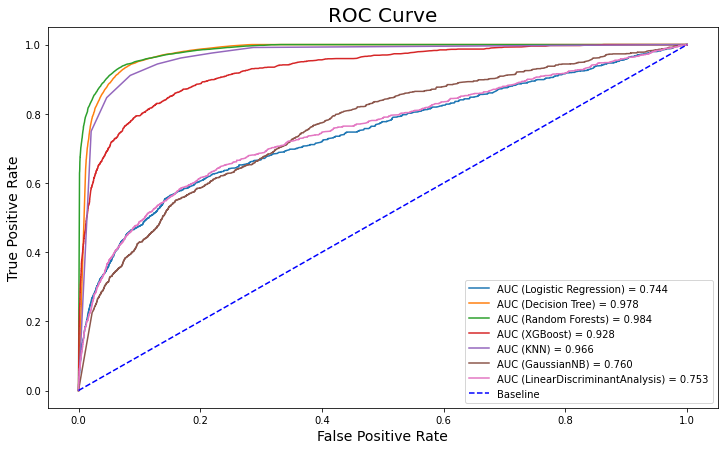

In [22]:
from sklearn.metrics import roc_auc_score, roc_curve

y_test_int = y_test
auc_lr = roc_auc_score(y_test_int, probs_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_int, probs_lr)

auc_dt = roc_auc_score(y_test_int, probs_dt)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_int, probs_dt)

auc_rf = roc_auc_score(y_test_int, probs_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_int, probs_rf)

auc_xg = roc_auc_score(y_test_int, probs_xg)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test_int, probs_xg)

auc_knn = roc_auc_score(y_test_int, probs_knn)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_int, probs_knn)

auc_nb = roc_auc_score(y_test_int, probs_nb)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test_int, probs_nb)

auc_lda = roc_auc_score(y_test_int, probs_lda)
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test_int, probs_lda)

plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.3f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.3f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.3f}')
plt.plot(fpr_xg, tpr_xg, label=f'AUC (XGBoost) = {auc_xg:.3f}')
plt.plot(fpr_knn, tpr_knn, label=f'AUC (KNN) = {auc_knn:.3f}')
plt.plot(fpr_nb, tpr_nb, label=f'AUC (GaussianNB) = {auc_nb:.3f}')
plt.plot(fpr_lda, tpr_lda, label=f'AUC (LinearDiscriminantAnalysis) = {auc_lda:.3f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

In [23]:
print('AUC (Logistic Regression) : %.3f ' % auc_lr)
print('AUC (Decision Tree) : %.3f ' % auc_dt)
print('AUC (Random Forest) : %.3f ' % auc_rf)
print('AUC (XGBoost) : %.3f ' % auc_xg)
print('AUC (KNeighbors) : %.3f ' % auc_knn)
print('AUC (GaussianNB) : %.3f ' % auc_nb)
print('AUC (LinearDiscriminantAnalysis) : %.3f ' % auc_lda)

AUC (Logistic Regression) : 0.744 
AUC (Decision Tree) : 0.978 
AUC (Random Forest) : 0.984 
AUC (XGBoost) : 0.928 
AUC (KNeighbors) : 0.966 
AUC (GaussianNB) : 0.760 
AUC (LinearDiscriminantAnalysis) : 0.753 


In [24]:
def plot_cm(y_true, y_pred, figsize=(5,5), titre='Matrix Confusion'):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(titre, size = 12)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

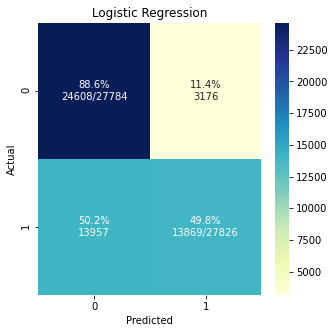

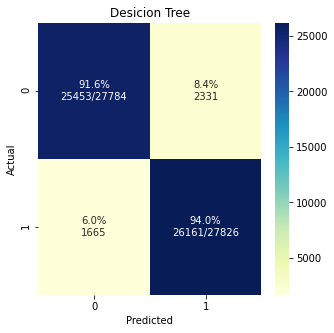

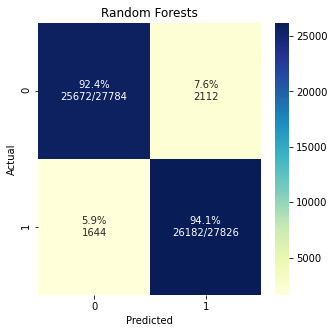

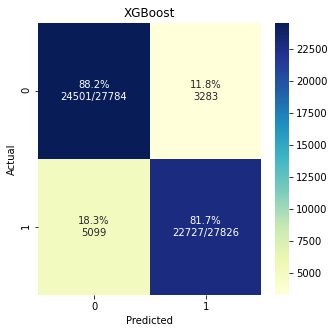

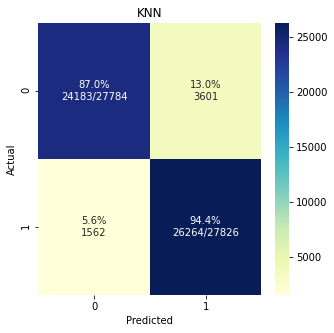

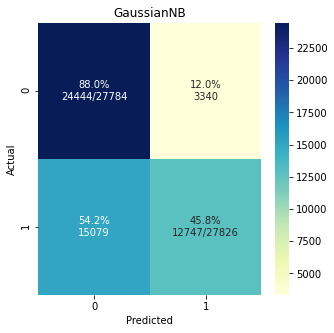

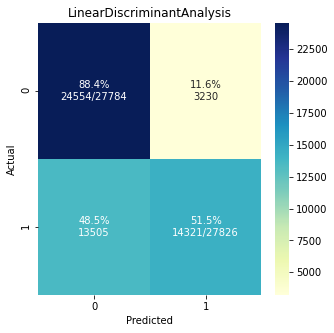

In [25]:
plot_cm(y_test_int, pred_lr, titre='Logistic Regression')
plot_cm(y_test_int, pred_dt, titre='Desicion Tree')
plot_cm(y_test_int, pred_rf, titre='Random Forests')
plot_cm(y_test_int, pred_xg, titre='XGBoost')
plot_cm(y_test_int, pred_knn, titre='KNN')
plot_cm(y_test_int, pred_nb, titre='GaussianNB')
plot_cm(y_test_int, pred_lda, titre='LinearDiscriminantAnalysis')

In [26]:
model_rf.feature_importances_

array([0.01936868, 0.0457885 , 0.34674906, 0.01108298, 0.25590573,
       0.07201484, 0.07247123, 0.01224114, 0.00834976, 0.01749371,
       0.02927432, 0.03450053, 0.02106105, 0.01564886, 0.02163026,
       0.01641934])

<BarContainer object of 16 artists>

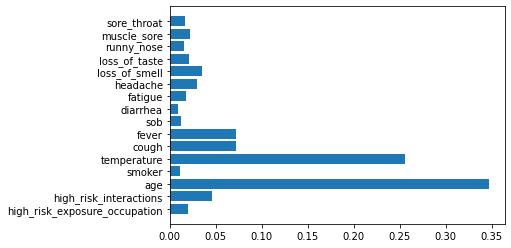

In [27]:
plt.barh(X.columns, model_rf.feature_importances_)